# GA

Best solution:  [-0.00981678  1.58129909]
Best solution fitness:  8.106211499161478


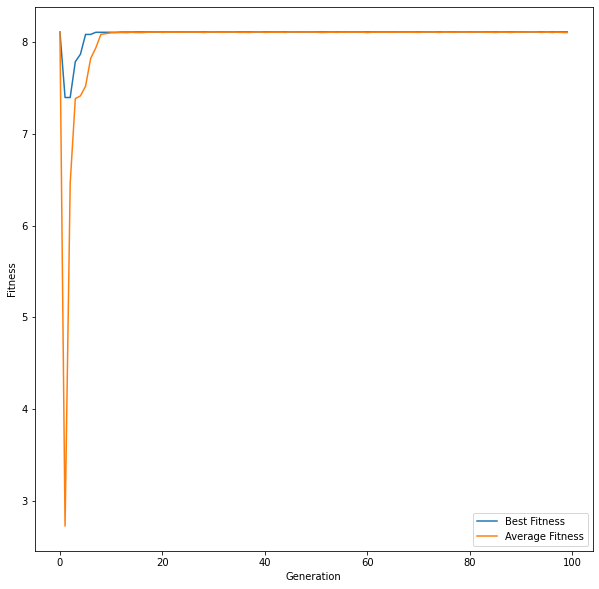

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from IPython.display import clear_output
import time
import random
import math

# Function to be maximized
def peaks(x):
    return (3*(1-x[0])**2*math.exp(-(x[0]**2) - (x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5)*math.exp(-x[0]**2-x[1]**2) - 1/3*math.exp(-(x[0]+1)**2 - x[1]**2))

# Plot function
def plot_peaks():
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = peaks([X, Y])
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title('Peaks Function')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

# Genetic Algorithm
class GA:
    def __init__(self, pop_size, num_parents, num_children, num_generations, num_genes, mutation_rate, mutation_step, x_range, y_range):
        self.pop_size = pop_size
        self.num_parents = num_parents
        self.num_children = num_children
        self.num_generations = num_generations
        self.num_genes = num_genes
        self.mutation_rate = mutation_rate
        self.mutation_step = mutation_step
        self.x_range = x_range
        self.y_range = y_range
        self.population = np.random.uniform(-3, 3, (self.pop_size, self.num_genes))
        self.fitness = np.zeros(self.pop_size)
        self.best_fitness = 0
        self.best_individual = np.zeros(self.num_genes)
        self.best_fitness_history = np.zeros(self.num_generations)
        self.best_individual_history = np.zeros((self.num_generations, self.num_genes))
        self.avg_fitness_history = np.zeros(self.num_generations)
        self.avg_fitness = 0
        self.best_fitness_history[0] = self.best_fitness
        self.best_individual_history[0] = self.best_individual
        self.avg_fitness_history[0] = self.avg_fitness

    def fitness_function(self):
        for i in range(self.pop_size):
            self.fitness[i] = peaks(self.population[i])
        self.avg_fitness = np.mean(self.fitness)
        self.avg_fitness_history[0] = self.avg_fitness
        if np.max(self.fitness) > self.best_fitness:
            self.best_fitness = np.max(self.fitness)
            self.best_individual = self.population[np.argmax(self.fitness)]
        self.best_fitness_history[0] = self.best_fitness
        self.best_individual_history[0] = self.best_individual

    def selection(self):
        parents = np.zeros((self.num_parents, self.num_genes))
        for i in range(self.num_parents):
            max_fitness_idx = np.where(self.fitness == np.max(self.fitness))
            max_fitness_idx = max_fitness_idx[0][0]
            parents[i] = self.population[max_fitness_idx]
            self.fitness[max_fitness_idx] = -99999999999
        return parents

    def crossover(self, parents):
        children = np.zeros((self.num_children, self.num_genes))
        crossover_point = np.uint8(self.num_genes/2)
        for i in range(self.num_children):
            parent1_idx = i%self.num_parents
            parent2_idx = (i+1)%self.num_parents
            children[i, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
            children[i, crossover_point:] = parents[parent2_idx, crossover_point:]
        return children
    
    def mutation(self, children):
        for i in range(self.num_children):
            if np.random.uniform(0, 1, 1) < self.mutation_rate:
                mutation_idx = np.random.randint(0, self.num_genes)
                children[i, mutation_idx] = children[i, mutation_idx] + np.random.uniform(-1*self.mutation_step, self.mutation_step, 1)
        return children
    
    def next_generation(self):
        parents = self.selection()
        children = self.crossover(parents)
        children = self.mutation(children)
        self.population[0:self.num_parents, :] = parents
        self.population[self.num_parents:self.pop_size, :] = children
        
    def run(self):
        self.fitness_function()
        for i in range(1, self.num_generations):
            self.next_generation()
            self.fitness_function()
            self.best_fitness_history[i] = self.best_fitness
            self.best_individual_history[i] = self.best_individual
            self.avg_fitness_history[i] = self.avg_fitness
            
    def plot_fitness(self):
        fig = plt.figure(figsize=(10, 10))
        plt.plot(self.best_fitness_history, label='Best Fitness')
        plt.plot(self.avg_fitness_history, label='Average Fitness')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.legend()
        plt.show()
        
    def plot_best(self):
        plot_peaks()
        plt.scatter(np.asscalar(self.best_individual_history[:, 0], self.best_individual_history[:, 1], c='r', s=100))
        plt.show()
        
    def plot_best_3d(self):
        plot_peaks()
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.best_individual_history[:, 0], self.best_individual_history[:, 1], self.best_fitness_history, c='r', s=100)
        plt.show()
        
    def plot_best_path(self):
        plot_peaks()
        plt.plot(self.best_individual_history[:, 0], self.best_individual_history[:, 1], c='r')
        plt.show()
        
    def plot_best_path_3d(self):
        plot_peaks()
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(self.best_individual_history[:, 0], self.best_individual_history[:, 1], self.best_fitness_history, c='r')
        plt.show()
        
        
ga = GA(pop_size=100, num_parents=20, num_children=80, num_generations=100, num_genes=2, mutation_rate=0.1, mutation_step=0.1, x_range=(-3, 3), y_range=(-3, 3))
ga.run()
print('Best solution: ', ga.best_individual)
print('Best solution fitness: ', ga.best_fitness)
ga.plot_fitness()

# PSO

Best solution:  [-0.01816957  1.58311171]
Best solution fitness:  8.105517817706277


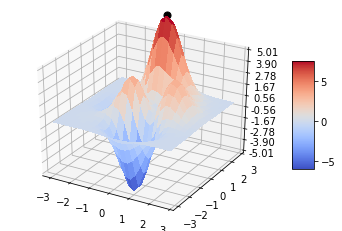

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Function to be optimized
def peaks(x, y):
    return 3*(1-x)**2*np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2)

# Particle swarm optimization (PSO) algorithm
class PSO:
    def __init__(self, x_min, x_max, y_min, y_max, n_particles, n_iterations, w, c1, c2):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.x = np.random.uniform(x_min, x_max, (n_particles, 2))
        self.v = np.random.uniform(-1, 1, (n_particles, 2))
        self.p = self.x
        self.p_best = self.x
        self.g_best = self.x[np.argmax([peaks(x[0], x[1]) for x in self.x])]

    def optimize(self):
        for i in range(self.n_iterations):
            for j in range(self.n_particles):
                if peaks(self.p[j][0], self.p[j][1]) > peaks(self.p_best[j][0], self.p_best[j][1]):
                    self.p_best[j] = self.p[j]
                if peaks(self.p_best[j][0], self.p_best[j][1]) > peaks(self.g_best[0], self.g_best[1]):
                    self.g_best = self.p_best[j]
            self.v = self.w*self.v + self.c1*np.random.uniform(0, 1, (self.n_particles, 2))*(self.p_best - self.x) + self.c2*np.random.uniform(0, 1, (self.n_particles, 2))*(self.g_best - self.x)
            self.x = self.x + self.v
            self.p = self.x
        return self.g_best
    
# Run PSO algorithm
pso = PSO(-3, 3, -3, 3, 100, 1000, 0.9, 2, 2)
print('Best solution: ', pso.optimize())
print('Best solution fitness: ', peaks(pso.g_best[0], pso.g_best[1]))

# Plot function with maximum
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(X, Y)
Z = peaks(X, Y)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-5.01, 5.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.scatter(pso.g_best[0], pso.g_best[1], peaks(pso.g_best[0], pso.g_best[1]), c='k', marker='o', s=50)
plt.show()
# print(pso.x)
# print(pso.v)
# print(pso.p)
# print(pso.p_best)
# print(pso.g_best)